In [1]:
# importing
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/MyDrive/NLP_Project

Mounted at /content/gdrive
/content/gdrive/MyDrive/NLP_Project


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/NLP_Project/training.csv', usecols=['text', 'label'])

# Preprocessing

In [ ]:
import re
import spacy

nlp = spacy.load('en_core_web_sm')

def clean_text(text):
    # Remove HTML tags
    html_regex = re.compile('<.*?>')
    text = html_regex.sub('', text)
    
    # Remove URLs
    url_regex = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = url_regex.sub('', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters
    regex = re.compile(r'[^a-zA-Z\d\s:]')
    text = regex.sub('', text)
    
    # Replace newline characters with spaces
    text = text.replace('\n', ' ')
  
    return text
    

In [ ]:
df['text'].apply(clean_text)

0       matt fitzpatrick defeats jordan spieth in dram...
1       who warns some hospitals in khartoum short of ...
2       excavation shows facility included luxurious d...
3       knight hits hattrick as usa stun rivals canada...
4       european council chiefs costly private jet use...
                              ...                        
1594    in the first of a new series of posts on the s...
1595    and there are lots of products we simply dont ...
1596    weve subsequently learned that firm departures...
1597    iraq is ready to commit to freezing the civil ...
1598    headquartered in zurich numbrs was one of the ...
Name: text, Length: 1599, dtype: object

llm      917
human    916
Name: label, dtype: int64
----------------------------------------------------


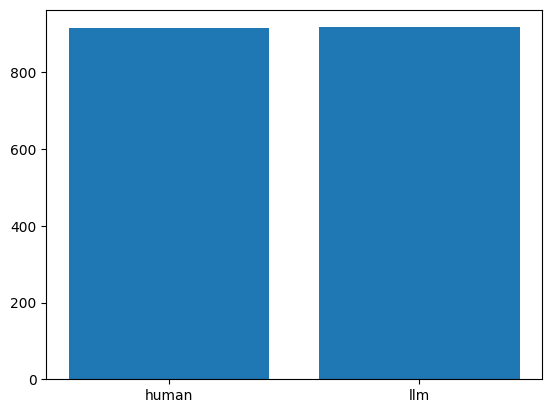

In [ ]:
# check how evenly distributed the quality ratings are
import matplotlib.pyplot as plt
classes = df['label'].unique()
counts = []

for i in classes:
  count = len(df[df['label']==i])
  counts.append(count)

print(df.label.value_counts())
print("----------------------------------------------------")

plt.bar(['human', 'llm'], counts)
plt.show();

# Model

In [ ]:
# define X and y
X = df.drop(columns=['label'])
y = df.label

X.shape, y.shape

((1833, 1), (1833,))

In [ ]:
# split the train and test data, 80:20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

# check it's split correctly
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1228, 1) (1228,)
(605, 1) (605,)


In [ ]:
print(X_train.iloc[0], y_train.iloc[0])

text    Banks have already started ditching payments w...
Name: 1395, dtype: object human


In [ ]:
# vectorize the text
vectorizer = TfidfVectorizer(tokenizer=lambda text: [token.text for token in nlp(text)], # takes the text and tokenizes it
                             preprocessor=lambda text: text.strip(), # strip whitespace from tokenized text
                             ngram_range=(1, 2), # unigrams and bigrams
                             min_df=5) # tokens must appear in at least 5 documents

In [ ]:
# vectorize the train and test sets
X_train = vectorizer.fit_transform(X_train['text'])
X_test = vectorizer.transform(X_test['text'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
# train the model
logreg = LogisticRegression(max_iter=750, C=100, solver="saga")
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=100, max_iter=750, solver='saga')

# Evaluation

In [ ]:
# evaluate the model
predictions = logreg.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       human       0.98      1.00      0.99       297
         llm       1.00      0.98      0.99       308

    accuracy                           0.99       605
   macro avg       0.99      0.99      0.99       605
weighted avg       0.99      0.99      0.99       605



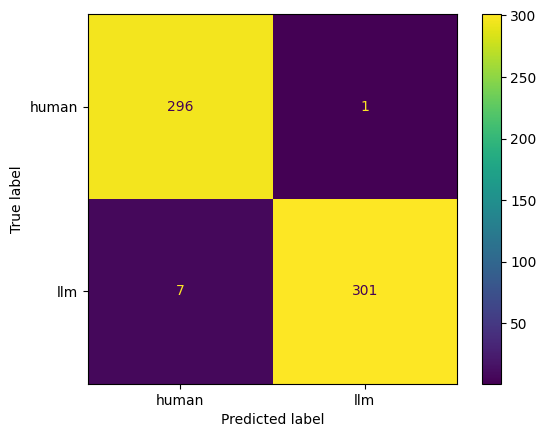

In [ ]:
# confusion matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predictions);

# Save the model and create a directory

In [5]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install huggingface-cli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement huggingface-cli (from versions: none)
ERROR: No matching distribution found for huggingface-cli


In [ ]:
huggingface-cli repo create <repo_name>